In [2]:
import os, sys
import iris
import iris.coord_categorisation
import matplotlib.pyplot as plt
import iris.plot as iplt
import numpy as np
import pandas as pd
import seaborn as sns
# sns.set(style="darkgrid")
import xarray as xr
import cartopy.crs as ccrs
import cmocean

cwd = os.getcwd()
repo_dir = '/'
for directory in cwd.split('/')[1:]:
    repo_dir = os.path.join(repo_dir, directory)
    if directory == 'ocean-analysis':
        break

modules_dir = os.path.join(repo_dir, 'modules')
sys.path.append(modules_dir)
try:
    import general_io as gio
except ImportError:
    raise ImportError('Must run this script from anywhere within the ocean-analysis git repo')


/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. E

In [11]:
# historical, historicalGHG, historicalMisc

zonal_dict = {}
region_dict = {}

## CMIP6

zonal_dict['BCC-CSM2-MR'] = ['/g/data/r87/dbi599/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/Ayr/pe/gn/v20181126/pe-zonal-region-sum-anomaly_Ayr_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412-cumsum.nc',
                             '/g/data/r87/dbi599/CMIP6/DAMIP/BCC/BCC-CSM2-MR/hist-GHG/r1i1p1f1/Ayr/pe/gn/v20190426/pe-zonal-region-sum-anomaly_Ayr_BCC-CSM2-MR_hist-GHG_r1i1p1f1_gn_185001-202012-cumsum.nc',
                             '/g/data/r87/dbi599/CMIP6/DAMIP/BCC/BCC-CSM2-MR/hist-aer/r1i1p1f1/Ayr/pe/gn/v20190507/pe-zonal-region-sum-anomaly_Ayr_BCC-CSM2-MR_hist-aer_r1i1p1f1_gn_185001-202012-cumsum.nc']

region_dict['BCC-CSM2-MR'] = ['/g/data/r87/dbi599/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/Ayr/pe/gn/v20181126/pe-region-sum-anomaly_Ayr_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412-cumsum.nc',
                              '/g/data/r87/dbi599/CMIP6/DAMIP/BCC/BCC-CSM2-MR/hist-GHG/r1i1p1f1/Ayr/pe/gn/v20190426/pe-region-sum-anomaly_Ayr_BCC-CSM2-MR_hist-GHG_r1i1p1f1_gn_185001-201412-cumsum.nc',
                              '/g/data/r87/dbi599/CMIP6/DAMIP/BCC/BCC-CSM2-MR/hist-aer/r1i1p1f1/Ayr/pe/gn/v20190507/pe-region-sum-anomaly_Ayr_BCC-CSM2-MR_hist-aer_r1i1p1f1_gn_185001-201412-cumsum.nc']


# CanESM5: r10i1p1f1 available for hist-GHG, r1i1p1f1 for hist-aer
# CNRM-CERFACS: Missing evspsbl control files (the first file): /g/data/oi10/replicas/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/piControl/r1i1p1f2/Amon/evspsbl/gr/v20180814/
# FGOALS-g3: years missing in hist-aer and hist-GHG data

zonal_dict['IPSL-CM6A-LR'] = ['/g/data/r87/dbi599/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Ayr/pe/gr/v20180803/pe-zonal-region-sum-anomaly_Ayr_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412-cumsum.nc',
                               '/g/data/r87/dbi599/CMIP6/DAMIP/IPSL/IPSL-CM6A-LR/hist-GHG/r1i1p1f1/Ayr/pe/gr/v20180914/pe-zonal-region-sum-anomaly_Ayr_IPSL-CM6A-LR_hist-GHG_r1i1p1f1_gr_185001-202012-cumsum.nc',
                               '/g/data/r87/dbi599/CMIP6/DAMIP/IPSL/IPSL-CM6A-LR/hist-aer/r1i1p1f1/Ayr/pe/gr/v20180914/pe-zonal-region-sum-anomaly_Ayr_IPSL-CM6A-LR_hist-aer_r1i1p1f1_gr_185001-202012-cumsum.nc']

region_dict['IPSL-CM6A-LR'] = ['/g/data/r87/dbi599/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Ayr/pe/gr/v20180803/pe-region-sum-anomaly_Ayr_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412-cumsum.nc',
                               '/g/data/r87/dbi599/CMIP6/DAMIP/IPSL/IPSL-CM6A-LR/hist-GHG/r1i1p1f1/Ayr/pe/gr/v20180914/pe-region-sum-anomaly_Ayr_IPSL-CM6A-LR_hist-GHG_r1i1p1f1_gr_185001-201412-cumsum.nc',
                               '/g/data/r87/dbi599/CMIP6/DAMIP/IPSL/IPSL-CM6A-LR/hist-aer/r1i1p1f1/Ayr/pe/gr/v20180914/pe-region-sum-anomaly_Ayr_IPSL-CM6A-LR_hist-aer_r1i1p1f1_gr_185001-202012-cumsum.nc']

## CMIP5

zonal_dict['CanESM2'] = ['/g/data/r87/dbi599/CMIP5/CMIP/CCCma/CanESM2/historical/r1i1p1/Ayr/pe/gn/v20120718/pe-zonal-region-sum-anomaly_Ayr_CanESM2_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/CCCma/CanESM2/historicalGHG/r1i1p1/Ayr/pe/gn/v20111027/pe-zonal-region-sum-anomaly_Ayr_CanESM2_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/CCCma/CanESM2/historicalMisc/r1i1p4/Ayr/pe/gn/v20111028/pe-zonal-region-sum-anomaly_Ayr_CanESM2_historicalMisc_r1i1p4_gn_185001-201212-cumsum.nc']

region_dict['CanESM2'] = ['/g/data/r87/dbi599/CMIP5/CMIP/CCCma/CanESM2/historical/r1i1p1/Ayr/pe/gn/v20120718/pe-region-sum-anomaly_Ayr_CanESM2_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/CCCma/CanESM2/historicalGHG/r1i1p1/Ayr/pe/gn/v20111027/pe-region-sum-anomaly_Ayr_CanESM2_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                          '/g/data/r87/dbi599/CMIP5/DAMIP/CCCma/CanESM2/historicalMisc/r1i1p4/Ayr/pe/gn/v20111028/pe-region-sum-anomaly_Ayr_CanESM2_historicalMisc_r1i1p4_gn_185001-201212-cumsum.nc']

zonal_dict['CCSM4'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NCAR/CCSM4/historical/r1i1p1/Ayr/pe/gn/v20160829/pe-zonal-region-sum-anomaly_Ayr_CCSM4_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                        '/g/data/r87/dbi599/CMIP5/DAMIP/NCAR/CCSM4/historicalGHG/r1i1p1/Ayr/pe/gn/v20120604/pe-zonal-region-sum-anomaly_Ayr_CCSM4_historicalGHG_r1i1p1_gn_185001-200512-cumsum.nc',
                        '/g/data/r87/dbi599/CMIP5/DAMIP/NCAR/CCSM4/historicalMisc/r1i1p10/Ayr/pe/gn/v20120604/pe-zonal-region-sum-anomaly_Ayr_CCSM4_historicalMisc_r1i1p10_gn_185001-200512-cumsum.nc']

region_dict['CCSM4'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NCAR/CCSM4/historical/r1i1p1/Ayr/pe/gn/v20160829/pe-region-sum-anomaly_Ayr_CCSM4_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                        '/g/data/r87/dbi599/CMIP5/DAMIP/NCAR/CCSM4/historicalGHG/r1i1p1/Ayr/pe/gn/v20120604/pe-region-sum-anomaly_Ayr_CCSM4_historicalGHG_r1i1p1_gn_185001-200512-cumsum.nc',
                        '/g/data/r87/dbi599/CMIP5/DAMIP/NCAR/CCSM4/historicalMisc/r1i1p10/Ayr/pe/gn/v20120604/pe-region-sum-anomaly_Ayr_CCSM4_historicalMisc_r1i1p10_gn_185001-200512-cumsum.nc']

zonal_dict['CSIRO-Mk3-6-0'] = ['/g/data/r87/dbi599/CMIP5/CMIP/CSIRO-QCCCE/CSIRO-Mk3-6-0/historical/r1i1p1/Ayr/pe/gn/v20110518/pe-zonal-region-sum-anomaly_Ayr_CSIRO-Mk3-6-0_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                                '/g/data/r87/dbi599/CMIP5/DAMIP/CSIRO-QCCCE/CSIRO-Mk3-6-0/historicalGHG/r1i1p1/Ayr/pe/gn/v20110518/pe-zonal-region-sum-anomaly_Ayr_CSIRO-Mk3-6-0_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                                '/g/data/r87/dbi599/CMIP5/DAMIP/CSIRO-QCCCE/CSIRO-Mk3-6-0/historicalMisc/r1i1p4/Ayr/pe/gn/v20110518/pe-zonal-region-sum-anomaly_Ayr_CSIRO-Mk3-6-0_historicalMisc_r1i1p4_gn_185001-201212-cumsum.nc']

region_dict['CSIRO-Mk3-6-0'] = ['',
                                '',
                                '']

zonal_dict['FGOALS-g2'] = ['/g/data/r87/dbi599/CMIP5/CMIP/LASG-CESS/FGOALS-g2/historical/r1i1p1/Ayr/pe/gn/v1/pe-zonal-region-sum-anomaly_Ayr_FGOALS-g2_historical_r1i1p1_gn_185001-201412-cumsum.nc',
                            '/g/data/r87/dbi599/CMIP5/DAMIP/LASG-CESS/FGOALS-g2/historicalGHG/r1i1p1/Ayr/pe/gn/v20161204/pe-zonal-region-sum-anomaly_Ayr_FGOALS-g2_historicalGHG_r1i1p1_gn_185001-200512-cumsum.nc',
                            '/g/data/r87/dbi599/CMIP5/DAMIP/LASG-CESS/FGOALS-g2/historicalMisc/r2i1p1/Ayr/pe/gn/v20161204/pe-zonal-region-sum-anomaly_Ayr_FGOALS-g2_historicalMisc_r2i1p1_gn_185001-200512-cumsum.nc']

region_dict['FGOALS-g2'] = ['/g/data/r87/dbi599/CMIP5/CMIP/LASG-CESS/FGOALS-g2/historical/r1i1p1/Ayr/pe/gn/v1/pe-region-sum-anomaly_Ayr_FGOALS-g2_historical_r1i1p1_gn_185001-201412-cumsum.nc',
                            '/g/data/r87/dbi599/CMIP5/DAMIP/LASG-CESS/FGOALS-g2/historicalGHG/r1i1p1/Ayr/pe/gn/v20161204/pe-region-sum-anomaly_Ayr_FGOALS-g2_historicalGHG_r1i1p1_gn_185001-200512-cumsum.nc',
                            '/g/data/r87/dbi599/CMIP5/DAMIP/LASG-CESS/FGOALS-g2/historicalMisc/r2i1p1/Ayr/pe/gn/v20161204/pe-region-sum-anomaly_Ayr_FGOALS-g2_historicalMisc_r2i1p1_gn_185001-200512-cumsum.nc']

zonal_dict['GFDL-CM3'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NOAA-GFDL/GFDL-CM3/historical/r1i1p1/Ayr/pe/gn/v20120227/pe-zonal-region-sum-anomaly_Ayr_GFDL-CM3_historical_r1i1p1_gn_186001-200512-cumsum.nc',
                           '/g/data/r87/dbi599/CMIP5/DAMIP/NOAA-GFDL/GFDL-CM3/historicalGHG/r1i1p1/Ayr/pe/gn/v20120227/pe-zonal-region-sum-anomaly_Ayr_GFDL-CM3_historicalGHG_r1i1p1_gn_186001-200512-cumsum.nc',
                           None]
#dataset_id=cmip5.output1.NOAA-GFDL.GFDL-CM3.historicalMisc.mon.atmos.Amon.r1i1p1.v20120227

zonal_dict['GFDL-ESM2M'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NOAA-GFDL/GFDL-ESM2M/historical/r1i1p1/Ayr/pe/gn/v20111228/pe-zonal-region-sum-anomaly_Ayr_GFDL-ESM2M_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                           '/g/data/r87/dbi599/CMIP5/CMIP/NOAA-GFDL/GFDL-ESM2M/historicalGHG/r1i1p1/Ayr/pe/gn/v20130214/pe-zonal-region-sum-anomaly_Ayr_GFDL-ESM2M_historicalGHG_r1i1p1_gn_185001-200512-cumsum.nc',
                           None]
#dataset_id=cmip5.output1.NOAA-GFDL.GFDL-ESM2M.historicalMisc.mon.atmos.Amon.r1i1p5.v20130214

zonal_dict['GISS-E2-H'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NASA-GISS/GISS-E2-H/historical/r1i1p1/Ayr/pe/gn/v20160426/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-H_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                            '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-H/historicalGHG/r1i1p1/Ayr/pe/gn/v20160426/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-H_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                            '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-H/historicalMisc/r1i1p107/Ayr/pe/gn/v20160427/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-H_historicalMisc_r1i1p107_gn_185001-200512-cumsum.nc']
#dataset_id=cmip5.output1.NASA-GISS.GISS-E2-H.historicalMisc.mon.atmos.Amon.r1i1p310.v20160427

zonal_dict['GISS-E2-R'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NASA-GISS/GISS-E2-R/historical/r1i1p1/Ayr/pe/gn/v20160502/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-R_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                            '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-R/historicalGHG/r1i1p1/Ayr/pe/gn/v20160429/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-R_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                            '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-R/historicalMisc/r1i1p310/Ayr/pe/gn/v20160503/pe-zonal-region-sum-anomaly_Ayr_GISS-E2-R_historicalMisc_r1i1p310_gn_185001-201212-cumsum.nc']
#dataset_id=cmip5.output1.NASA-GISS.GISS-E2-R.historicalMisc.mon.atmos.Amon.r1i1p107.v20160503

zonal_dict['IPSL-CM5A-LR'] = ['/g/data/r87/dbi599/CMIP5/CMIP/IPSL/IPSL-CM5A-LR/historical/r1i1p1/Ayr/pe/gn/v20110406/pe-zonal-region-sum-anomaly_Ayr_IPSL-CM5A-LR_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                               '/g/data/r87/dbi599/CMIP5/DAMIP/IPSL/IPSL-CM5A-LR/historicalGHG/r1i1p1/Ayr/pe/gn/v20120526/pe-zonal-region-sum-anomaly_Ayr_IPSL-CM5A-LR_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                               None]
#dataset_id=cmip5.output1.IPSL.IPSL-CM5A-LR.historicalMisc.mon.atmos.Amon.r1i1p3.v20111119

zonal_dict['NorESM1-M'] = ['/g/data/r87/dbi599/CMIP5/CMIP/NCC/NorESM1-M/historical/r1i1p1/Ayr/pe/gn/v20110901/pe-zonal-region-sum-anomaly_Ayr_NorESM1-M_historical_r1i1p1_gn_185001-200512-cumsum.nc',
                            '/g/data/r87/dbi599/CMIP5/DAMIP/NCC/NorESM1-M/historicalGHG/r1i1p1/Ayr/pe/gn/v20110918/pe-zonal-region-sum-anomaly_Ayr_NorESM1-M_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc',
                            '/g/data/r87/dbi599/CMIP5/DAMIP/NCC/NorESM1-M/historicalMisc/r1i1p1/Ayr/pe/gn/v20110918/pe-zonal-region-sum-anomaly_Ayr_NorESM1-M_historicalMisc_r1i1p1_gn_185001-201212-cumsum.nc']

In [4]:
spatial_dict = {}

spatial_dict[('BCC-CSM2-MR', 'historical')] = '/g/data/r87/dbi599/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/Ayr/pe/gn/v20181126/pe-anomaly_Ayr_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412-cumsum.nc'
spatial_dict[('CanESM2', 'historicalMisc')] = '/g/data/r87/dbi599/CMIP5/DAMIP/CCCma/CanESM2/historicalMisc/r1i1p4/Ayr/pe/gn/v20111028/pe-anomaly_Ayr_CanESM2_historicalMisc_r1i1p4_gn_185001-201212-cumsum.nc'
spatial_dict[('GISS-E2-H', 'historicalMisc')] = '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-H/historicalMisc/r1i1p107/Ayr/pe/gn/v20160427/pe-anomaly_Ayr_GISS-E2-H_historicalMisc_r1i1p107_gn_185001-200512-cumsum.nc'
spatial_dict[('GISS-E2-H', 'historicalGHG')] = '/g/data/r87/dbi599/CMIP5/DAMIP/NASA-GISS/GISS-E2-H/historicalGHG/r1i1p1/Ayr/pe/gn/v20160426/pe-anomaly_Ayr_GISS-E2-H_historicalGHG_r1i1p1_gn_185001-201212-cumsum.nc'
spatial_dict[('NorESM1-M', 'hist-aer')] = ''

In [5]:
def get_data(infile, time_constraint):
    """Get the data for a particular model"""
    
    cube, history = gio.combine_files(infile, 'precipitation minus evaporation flux', new_calendar='365_day')
    #cube = iris.load_cube(infile, 'precipitation minus evaporation flux' & time_constraint)
    cube = cube.extract(time_constraint)
    iris.coord_categorisation.add_year(cube, 'time')
    anomaly_data = cube.data - cube.data[0, :]
    start_data = cube.data[0, :]
    
    return cube, anomaly_data, start_data


def plot_data(file_list, model):
    """Create the plot"""

    output = []
    hist_file, ghg_file, aa_file = file_list
    time_constraint = gio.get_time_constraint(['1861-01-01', '2005-12-31'])
    
    hist_cube, hist_anomaly_data, hist_start_data = get_data(hist_file, time_constraint)
    ghg_cube, ghg_anomaly_data, ghg_start_data = get_data(ghg_file, time_constraint)
    if aa_file:
        aa_cube, aa_anomaly_data, aa_start_data = get_data(aa_file, time_constraint)
    else:
        aa_cube = aa_anomaly_data = aa_start_data = None
    
    fig = plt.figure(figsize=[16,12])
    ax0 = plt.subplot2grid((3,6), (0,2), colspan=2)
    ax1 = plt.subplot2grid(shape=(3,6), loc=(1,0), colspan=2)
    ax2 = plt.subplot2grid((3,6), (1,2), colspan=2)
    ax3 = plt.subplot2grid((3,6), (1,4), colspan=2)
    ax4 = plt.subplot2grid((3,6), (2,1), colspan=2)
    ax5 = plt.subplot2grid((3,6), (2,3), colspan=2)

    xvals = [0, 1, 2, 3, 4]
    ax0.bar(xvals, hist_start_data, color='0.5')
    ax0.set_ylabel('kg')
    ax0.set_xticklabels(['', 'SH precip', 'SH evap', 'trop precip', 'NH evap', 'NH precip'])
    ax0.set_title('Year One')

    hist_years = hist_cube.coord('year').points
    ghg_years = ghg_cube.coord('year').points
    if aa_cube:
        aa_years = aa_cube.coord('year').points
    
    #max_value = np.abs(ghg_anomaly_data).max() * 1.1
    max_value = 3.5e17
    
    ax1.plot(ghg_years, ghg_anomaly_data[:,0], color='red', label='GHG-only')
    ax1.plot(hist_years, hist_anomaly_data[:,0], color='black', label='historical')
    if aa_cube:
        ax1.plot(aa_years, aa_anomaly_data[:,0], color='blue', label='AA-only')
    ax1.set_title('SH precip')
    ax1.set_ylabel('kg')
    ax1.set_ylim([-max_value, max_value])
    ax1.grid(True, color='0.8', linestyle='--')
    ax1.legend()

    ax4.plot(ghg_years, ghg_anomaly_data[:,1], color='red', label='GHG-only')
    ax4.plot(hist_years, hist_anomaly_data[:,1], color='black', label='historical')
    if aa_cube:
        ax4.plot(aa_years, aa_anomaly_data[:,1], color='blue', label='AA-only')
    ax4.set_title('SH evap')
    ax4.set_ylabel('kg')
    ax4.set_ylim([-max_value, max_value])
    ax4.grid(True, color='0.8', linestyle='--')

    ax2.plot(ghg_years, ghg_anomaly_data[:,2], color='red', label='GHG-only')
    ax2.plot(hist_years, hist_anomaly_data[:,2], color='black', label='historical')
    if aa_cube:
        ax2.plot(aa_years, aa_anomaly_data[:,2], color='blue', label='AA-only')
    ax2.set_title('tropical precip')
    ax2.set_ylim([-max_value, max_value])
    ax2.grid(True, color='0.8', linestyle='--')

    ax5.plot(ghg_years, ghg_anomaly_data[:,3], color='red', label='GHG-only')
    ax5.plot(hist_years, hist_anomaly_data[:,3], color='black', label='historical')
    if aa_cube:
        ax5.plot(aa_years, aa_anomaly_data[:,3], color='blue', label='AA-only')
    ax5.set_title('NH evap')
    ax5.set_ylim([-max_value, max_value])
    ax5.grid(True, color='0.8', linestyle='--')

    ax3.plot(ghg_years, ghg_anomaly_data[:,4], color='red', label='GHG-only')
    ax3.plot(hist_years, hist_anomaly_data[:,4], color='black', label='historical')
    if aa_cube:
        ax3.plot(aa_years, aa_anomaly_data[:,4], color='blue', label='AA-only')
    ax3.set_title('NH precip')
    ax3.set_ylim([-max_value, max_value])
    ax3.grid(True, color='0.8', linestyle='--')

    #ax3.set_yticks([])
    fig.tight_layout()
    plt.show()
    
    data = [[model, 'GHG-only', 'SH precip', ghg_start_data[0], ghg_anomaly_data[-1, 0]],
            [model, 'historical', 'SH precip', hist_start_data[0], hist_anomaly_data[-1, 0]],
            [model, 'AA-only', 'SH precip', aa_start_data[0] if aa_cube else None, aa_anomaly_data[-1, 0] if aa_cube else None],
            [model, 'GHG-only', 'SH evap', ghg_start_data[1], ghg_anomaly_data[-1, 1]],
            [model, 'historical', 'SH evap', hist_start_data[1], hist_anomaly_data[-1, 1]],
            [model, 'AA-only', 'SH evap', aa_start_data[1] if aa_cube else None, aa_anomaly_data[-1, 1] if aa_cube else None],
            [model, 'GHG-only', 'tropical precip', ghg_start_data[2], ghg_anomaly_data[-1, 2]],
            [model, 'historical', 'tropical precip', hist_start_data[2], hist_anomaly_data[-1, 2]],
            [model, 'AA-only', 'tropical precip', aa_start_data[2] if aa_cube else None, aa_anomaly_data[-1, 2] if aa_cube else None],
            [model, 'GHG-only', 'NH evap', ghg_start_data[3], ghg_anomaly_data[-1, 3]],
            [model, 'historical', 'NH evap', hist_start_data[3], hist_anomaly_data[-1, 3]],
            [model, 'AA-only', 'NH evap', aa_start_data[3] if aa_cube else None, aa_anomaly_data[-1, 3] if aa_cube else None],
            [model, 'GHG-only', 'NH precip', ghg_start_data[4], ghg_anomaly_data[-1, 4]],
            [model, 'historical', 'NH precip', hist_start_data[4], hist_anomaly_data[-1, 4]],
            [model, 'AA-only', 'NH precip', aa_start_data[4] if aa_cube else None, aa_anomaly_data[-1, 4] if aa_cube else None]]
           
    df = pd.DataFrame(data, columns = ['model', 'experiment', 'region', 'start', 'cumulative_change'])
    df['percentage_change'] = ((df['cumulative_change'] / hist_anomaly_data.shape[0]) / df['start']) * 100
    
    return df

In [6]:
def plot_spatial(infile, contours=False):
    """Plot spatial P-E accumulation"""

    dset = xr.open_dataset(infile)
    start = dset['pe'].isel(time=0)
    end = dset['pe'].isel(time=-10)

    fig = plt.figure(figsize=[12,15])
    ax1 = fig.add_subplot(311, projection=ccrs.PlateCarree(central_longitude=180))
    ax2 = fig.add_subplot(312, projection=ccrs.PlateCarree(central_longitude=180))
    ax3 = fig.add_subplot(313, projection=ccrs.PlateCarree(central_longitude=180))

    start.plot.contourf(ax=ax1,
                        levels=np.arange(-2500, 2500.1, 500),
                        extend='both',
                        transform=ccrs.PlateCarree(),
                        cbar_kwargs={'label': start.units},
                        cmap='BrBG')
    
    end.plot.contourf(ax=ax2,
                      extend='both',
                      levels=np.arange(-18750, 18750.1, 2500),
                      transform=ccrs.PlateCarree(),
                      cbar_kwargs={'label': end.units},
                      cmap='RdBu')
    
    end.plot.contourf(ax=ax3,
                      extend='both',
                      levels=np.arange(-18750, 18750.1, 2500),
                      transform=ccrs.PlateCarree(),
                      cbar_kwargs={'label': end.units},
                      cmap='RdBu')

    start.plot.contour(ax=ax3,
                       levels=np.array([-500, 0, 500]),
                       transform=ccrs.PlateCarree(),
                       colors=['darkgoldenrod', 'black', 'green'])

    ax1.coastlines()
    ax2.coastlines()
    ax3.coastlines()
    ax1.gridlines()
    ax2.gridlines()
    ax3.gridlines()

    ax1.set_title('(a) Total annual P-E (first year)')
    ax2.set_title('(b) Accumulated P-E anomaly')
    ax3.set_title('(c) Combination of (a) and (b)')
    plt.show()

In [7]:
zonal_df_dict = {}
region_df_dict = {}

## BCC-CSM2-MR

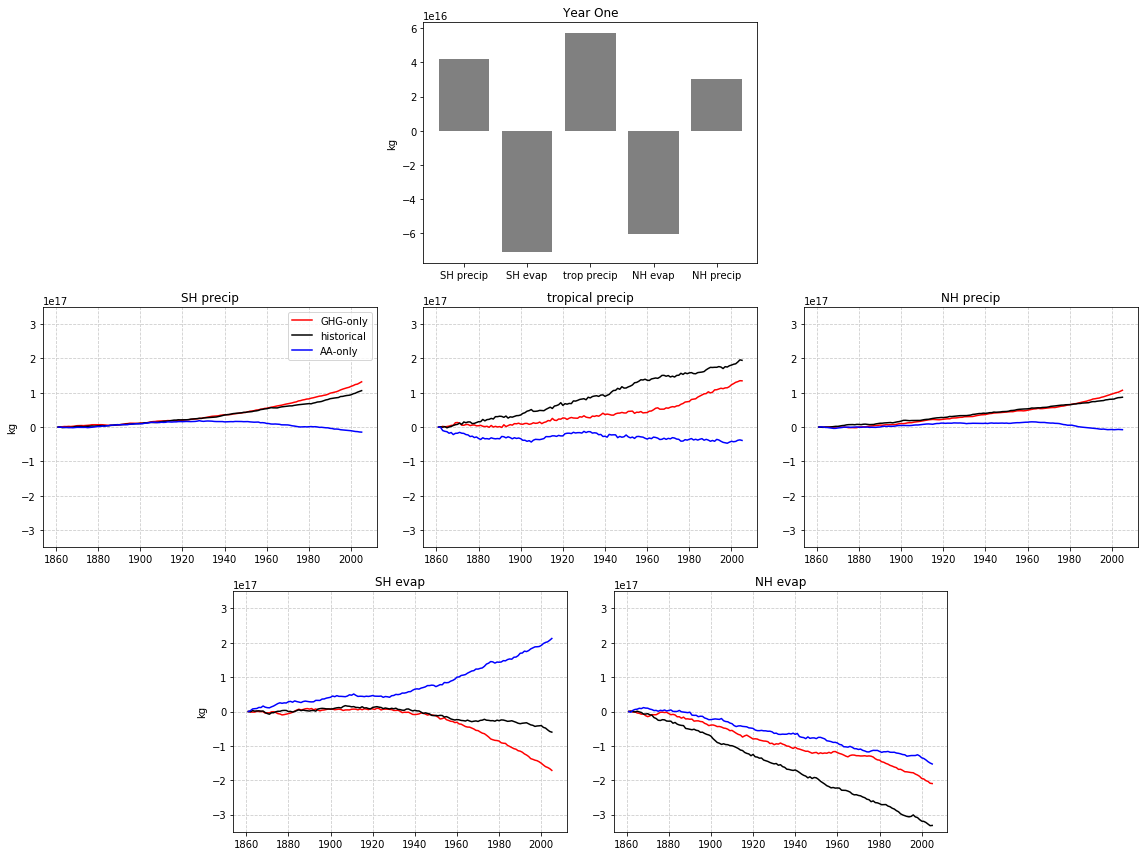

In [7]:
zonal_df_dict['BCC-CSM2-MR'] = plot_data(zonal_dict['BCC-CSM2-MR'], 'BCC-CSM2-MR')

**Figure.**  
Top panel: Annual region-integrated P-E for the first year of the historical experiment.  
Remaining panels: Cumulative region-integrated P-E anomaly for the GHG-only (red), AA-only (blue) and historical (black) experiments.

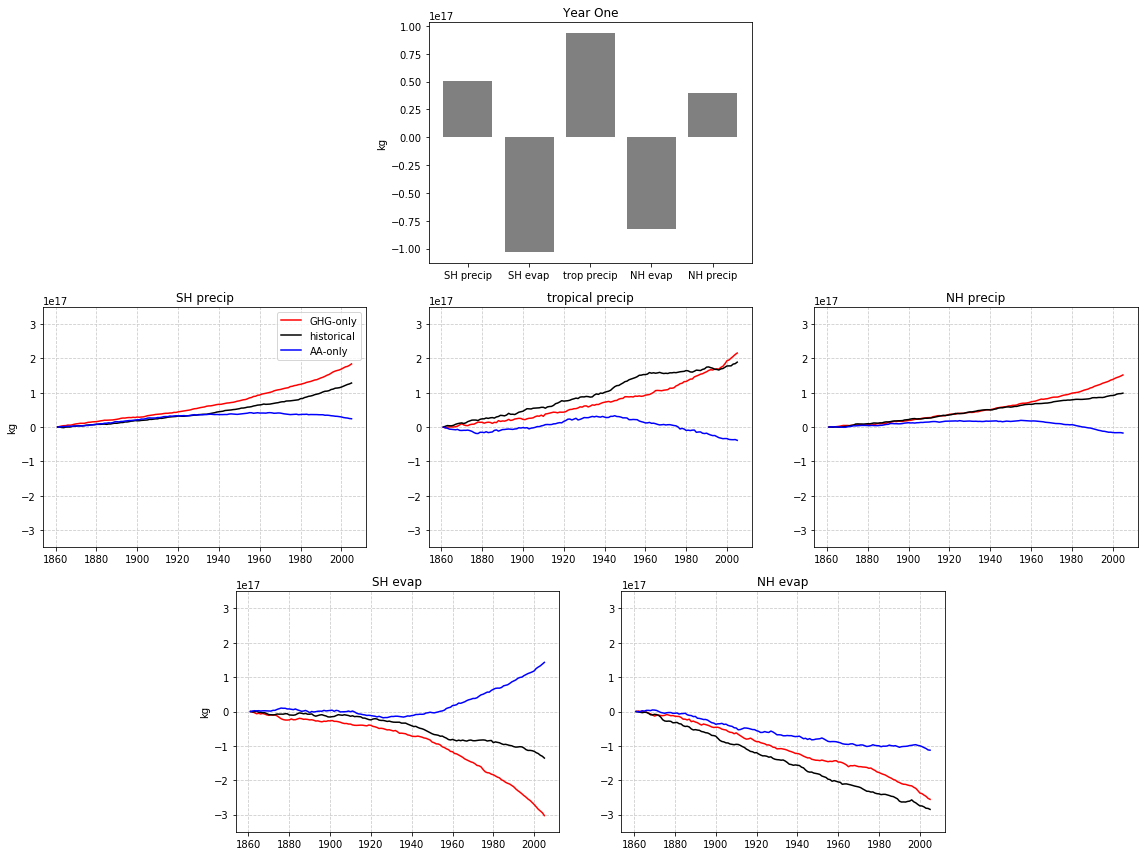

In [8]:
region_df_dict['BCC-CSM2-MR'] = plot_data(region_dict['BCC-CSM2-MR'], 'BCC-CSM2-MR')

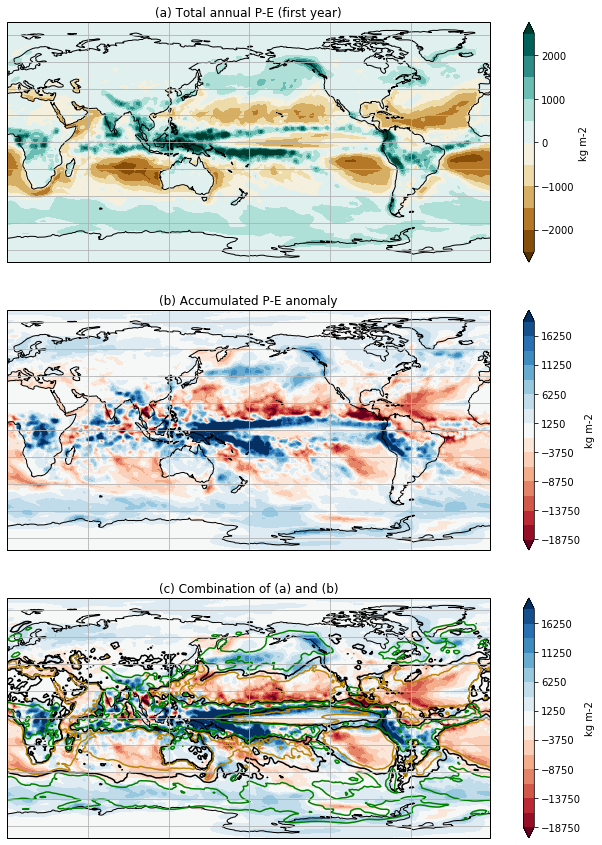

In [9]:
plot_spatial(spatial_dict[('BCC-CSM2-MR', 'historical')])

## IPSL-CM6A-LR

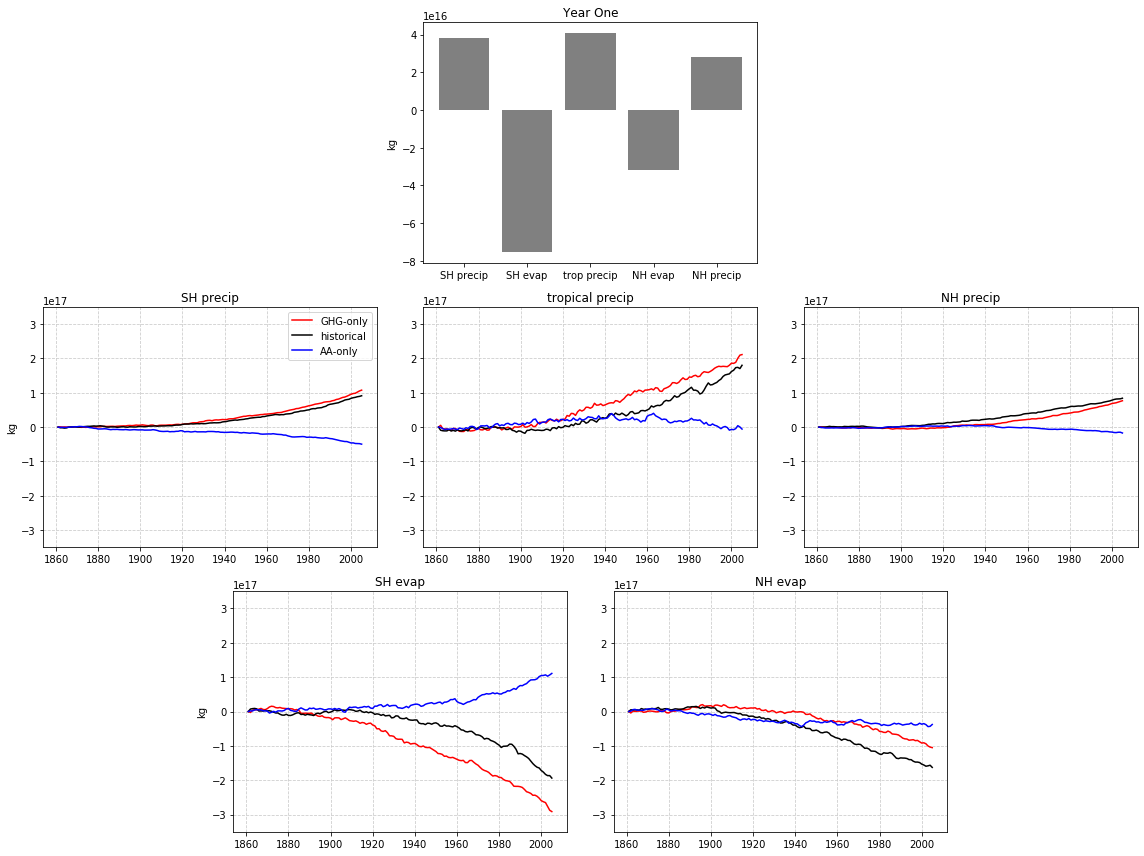

In [10]:
zonal_df_dict['IPSL-CM6A-LR'] = plot_data(zonal_dict['IPSL-CM6A-LR'], 'IPSL-CM6A-LR')

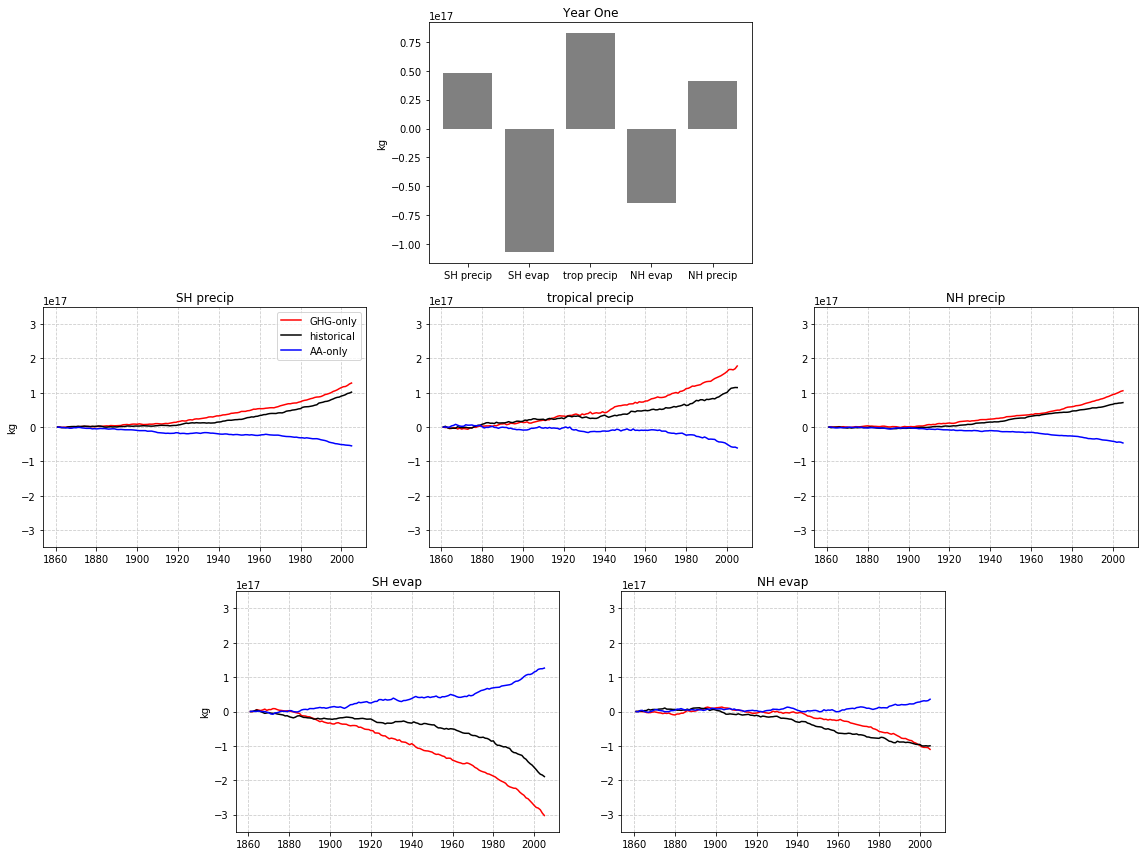

In [87]:
region_df_dict['IPSL-CM6A-LR'] = plot_data(region_dict['IPSL-CM6A-LR'],'IPSL-CM6A-LR')

## CanESM2

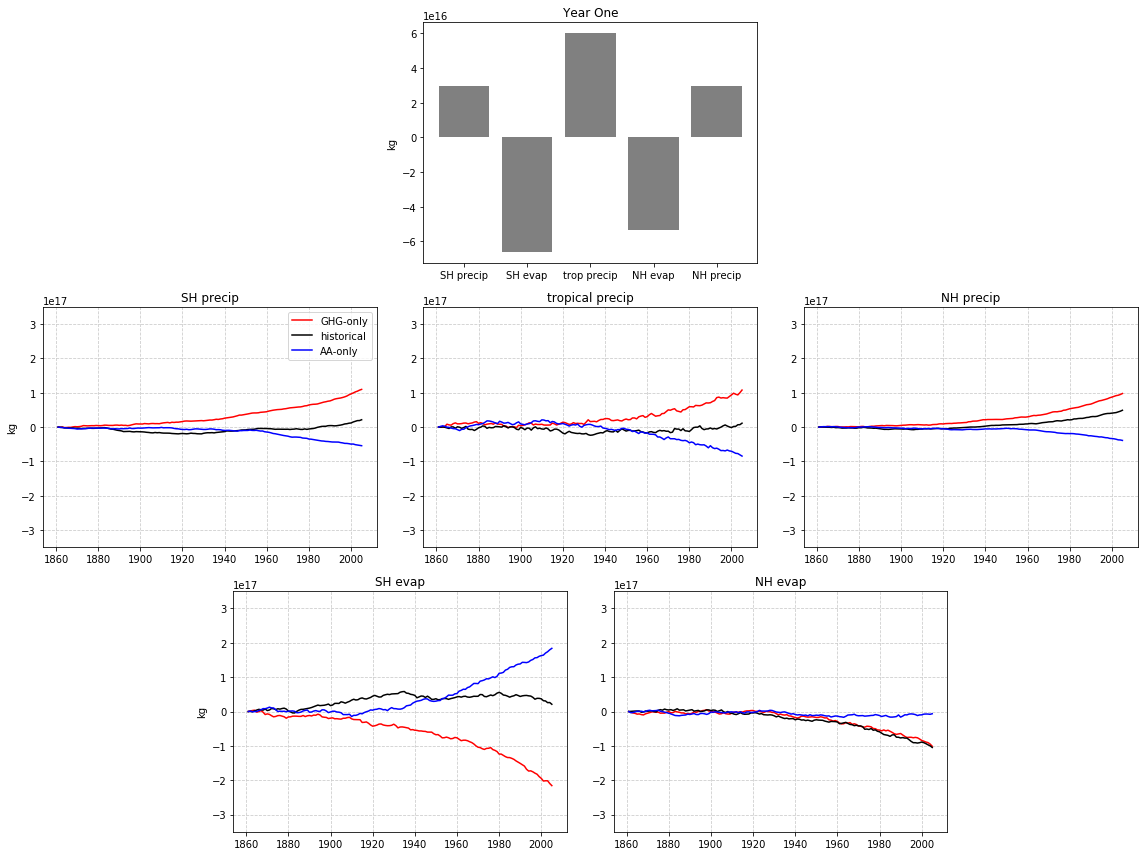

In [11]:
zonal_df_dict['CanESM2'] = plot_data(zonal_dict['CanESM2'], 'CanESM2')

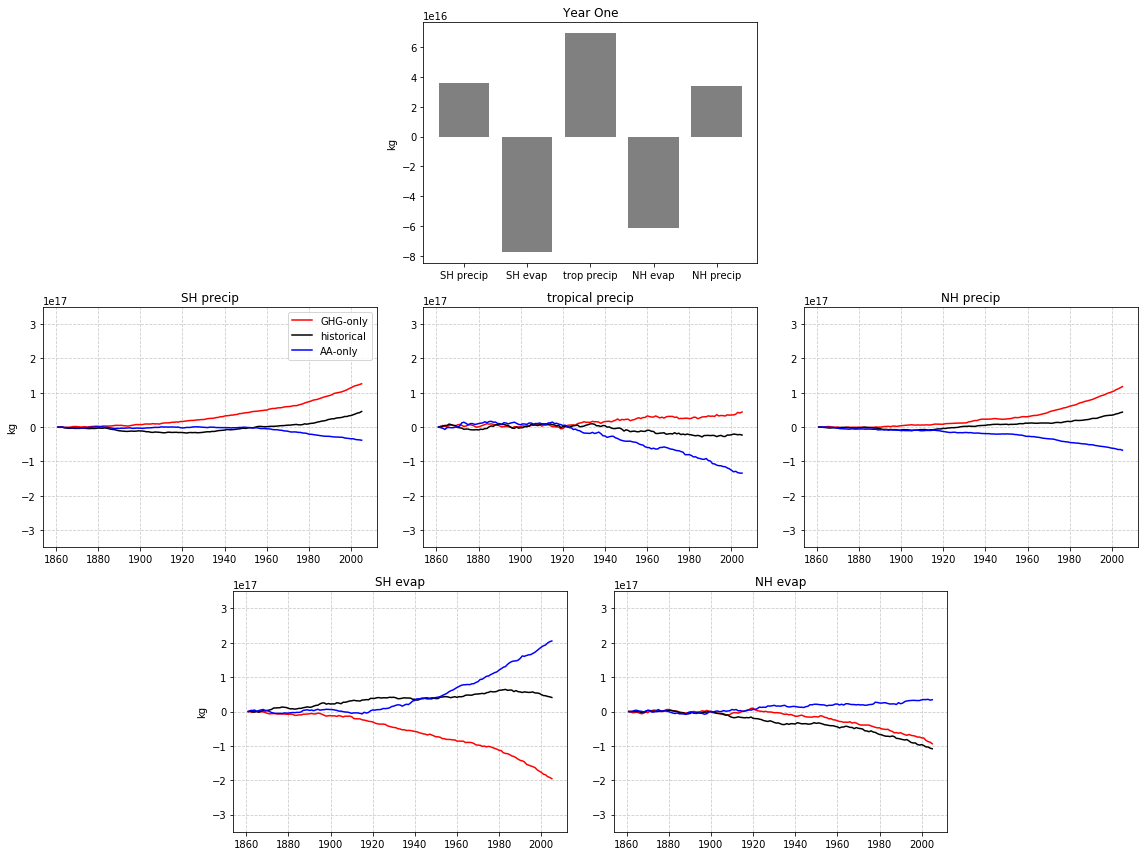

In [8]:
region_df_dict['CanESM2'] = plot_data(region_dict['CanESM2'], 'CanESM2')

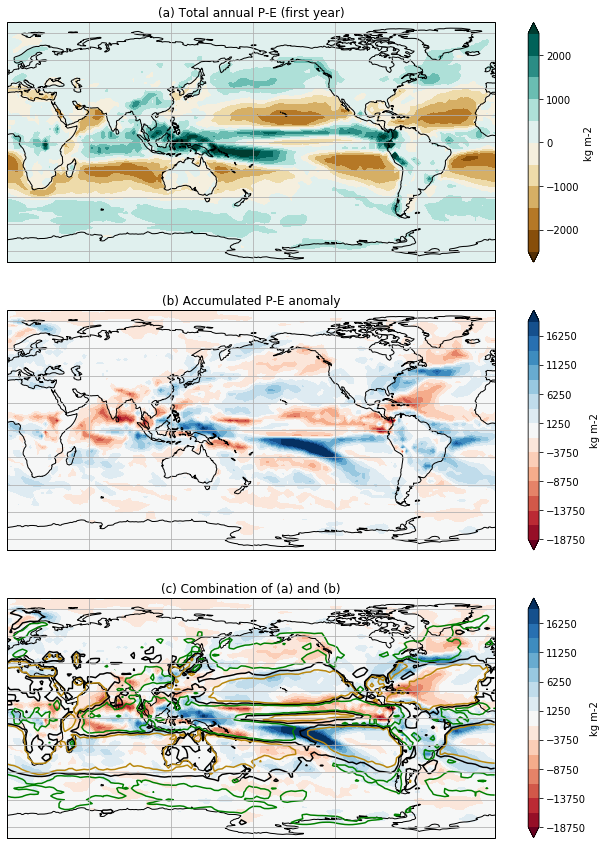

In [12]:
plot_spatial(spatial_dict[('CanESM2', 'historicalMisc')])

## FGOALS-g2

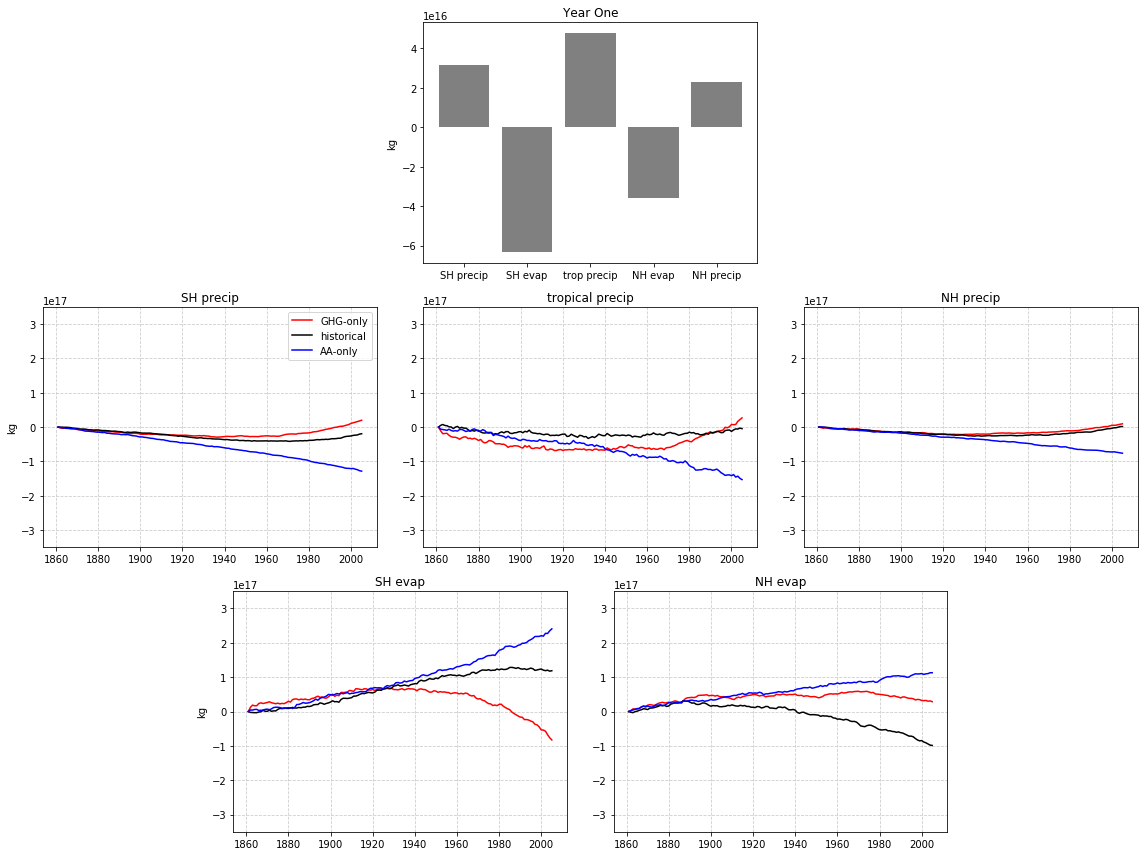

In [13]:
zonal_df_dict['FGOALS-g2'] = plot_data(zonal_dict['FGOALS-g2'], 'FGOALS-g2')

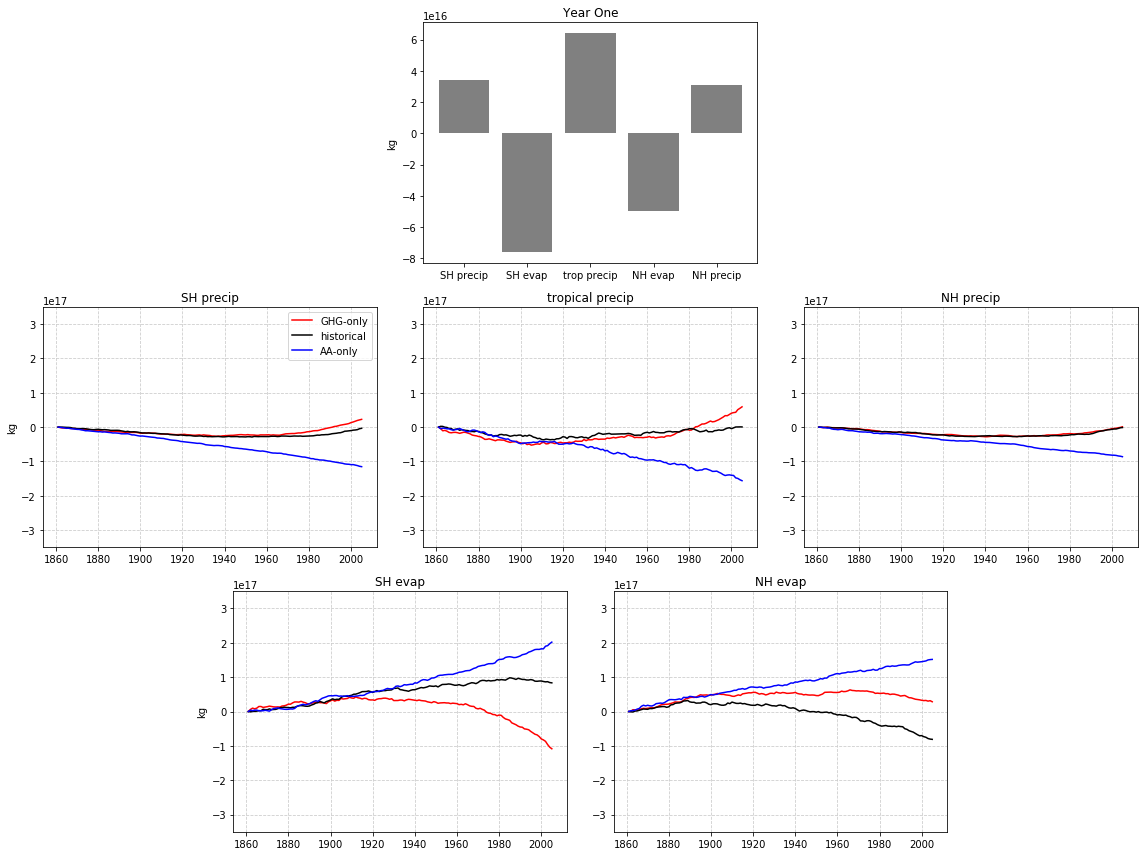

In [12]:
region_df_dict['FGOALS-g2'] = plot_data(region_dict['FGOALS-g2'], 'FGOALS-g2')

## GFDL-CM3

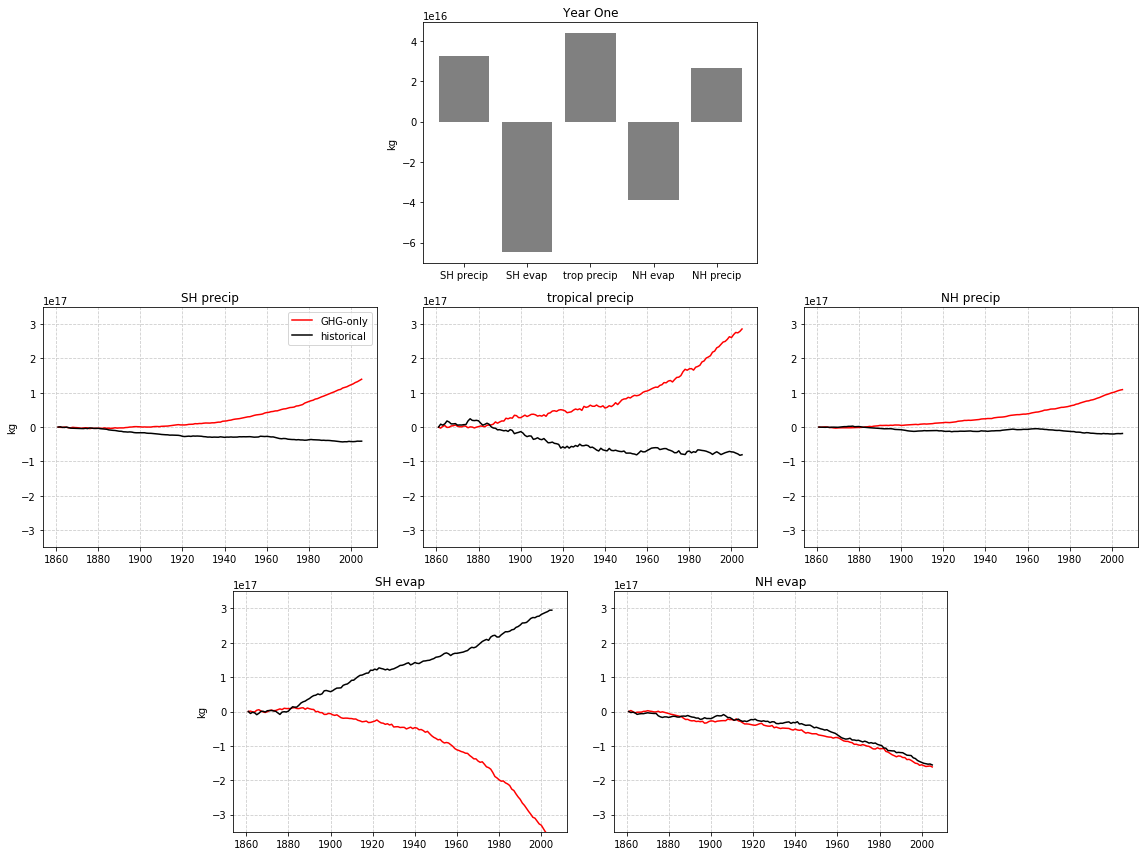

In [14]:
zonal_df_dict['GFDL-CM3'] = plot_data(zonal_dict['GFDL-CM3'], 'GFDL-CM3')

## GFDL-ESM2M

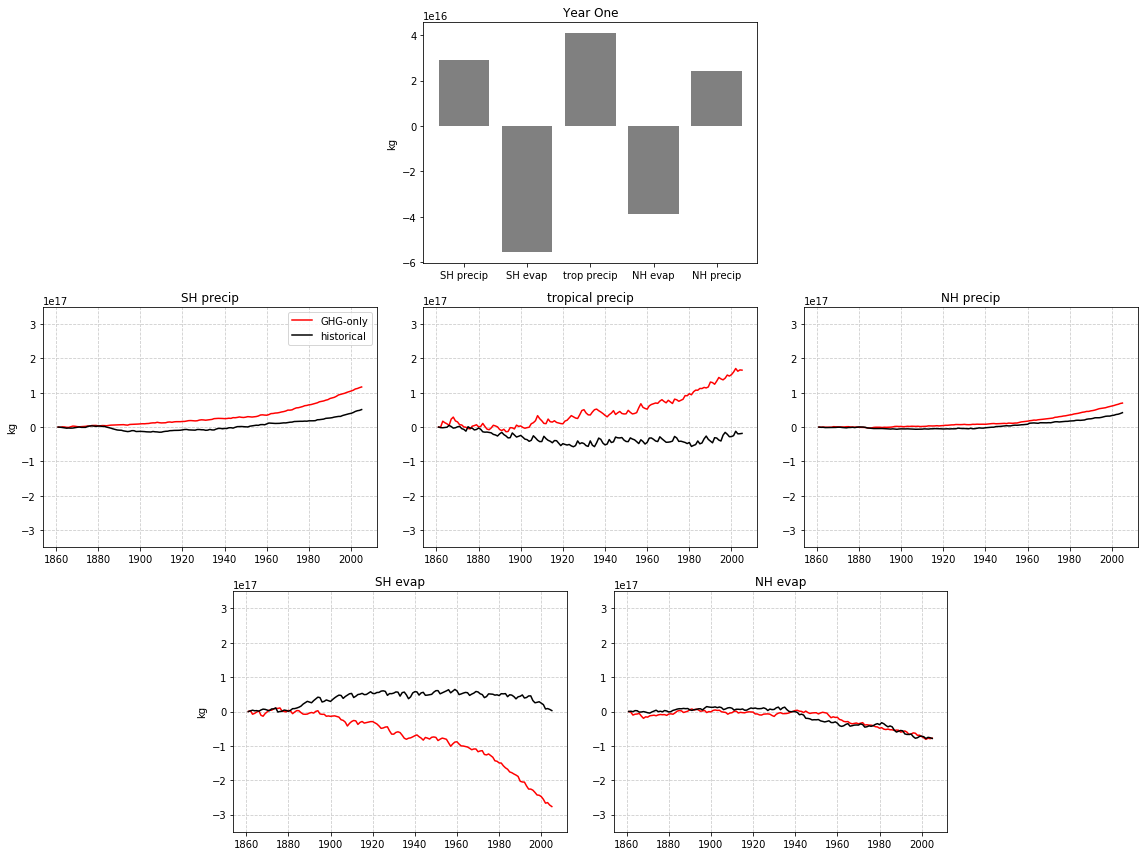

In [15]:
zonal_df_dict['GFDL-ESM2M'] = plot_data(zonal_dict['GFDL-ESM2M'], 'GFDL-ESM2M')

## GISS-E2-H

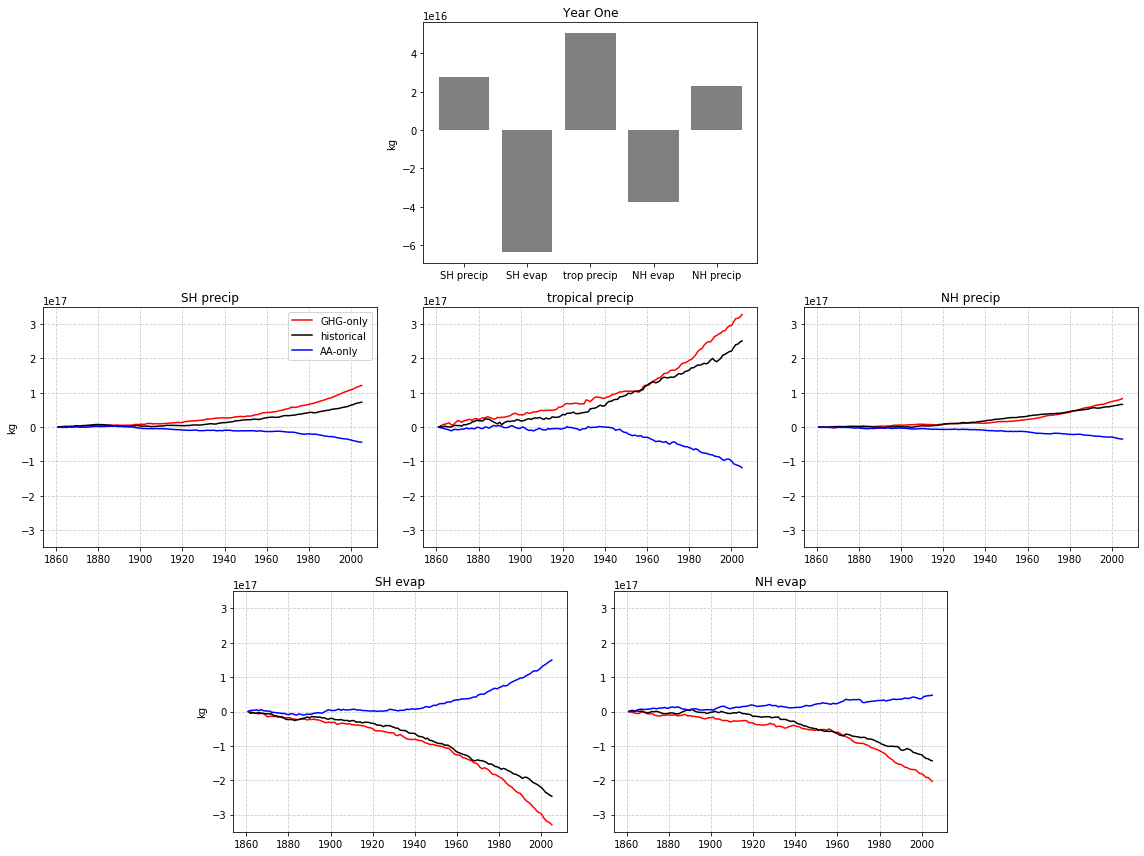

In [16]:
zonal_df_dict['GISS-E2-H'] = plot_data(zonal_dict['GISS-E2-H'], 'GISS-E2-H')

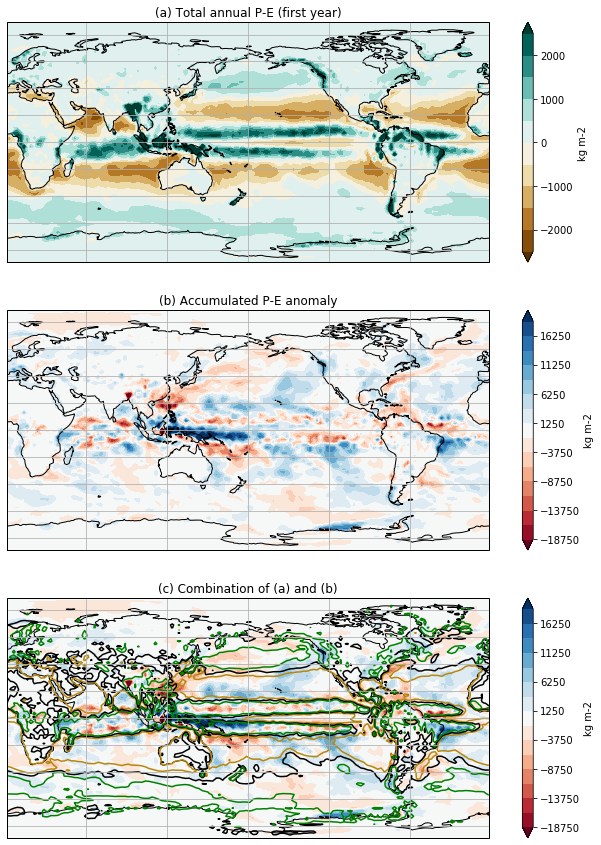

In [17]:
plot_spatial(spatial_dict[('GISS-E2-H', 'historicalMisc')])

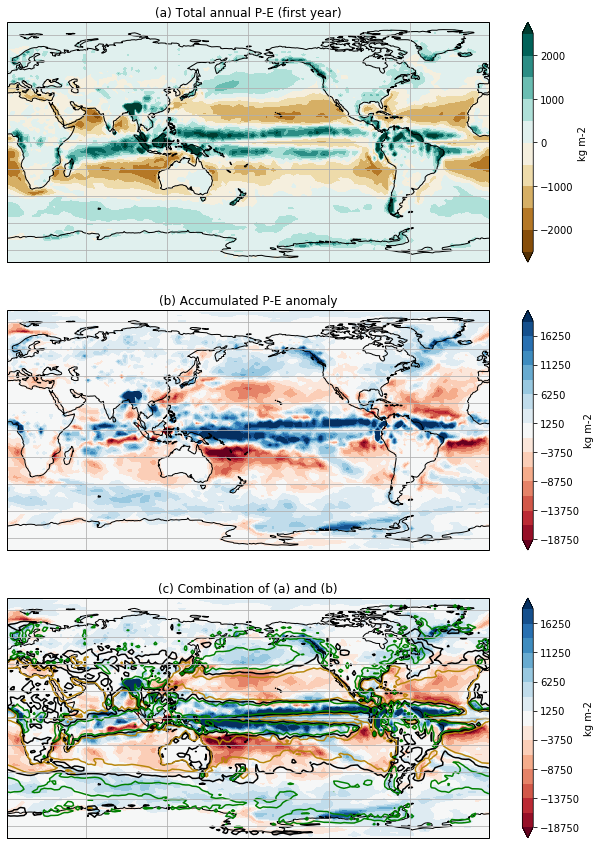

In [18]:
plot_spatial(spatial_dict[('GISS-E2-H', 'historicalGHG')])

## GISS-E2-R

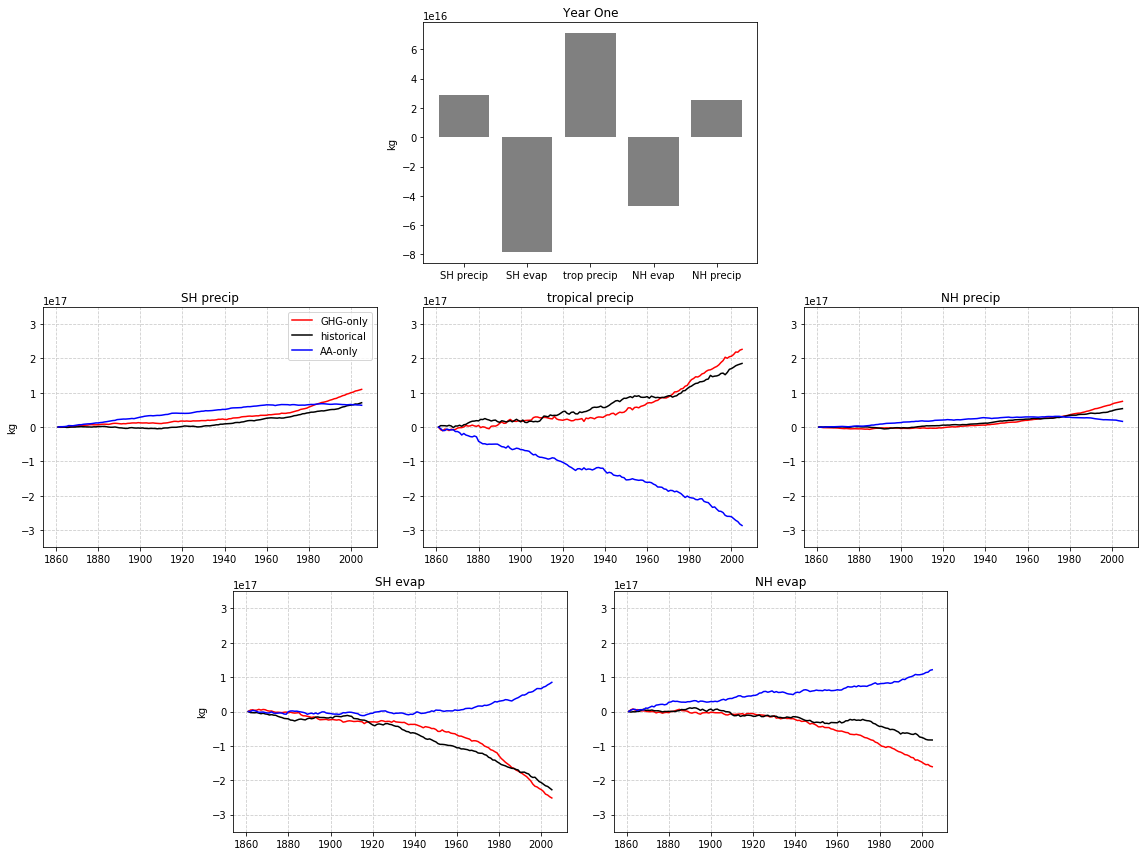

In [19]:
zonal_df_dict['GISS-E2-R'] = plot_data(zonal_dict['GISS-E2-R'], 'GISS-E2-R')

## IPSL-CM5A-LR

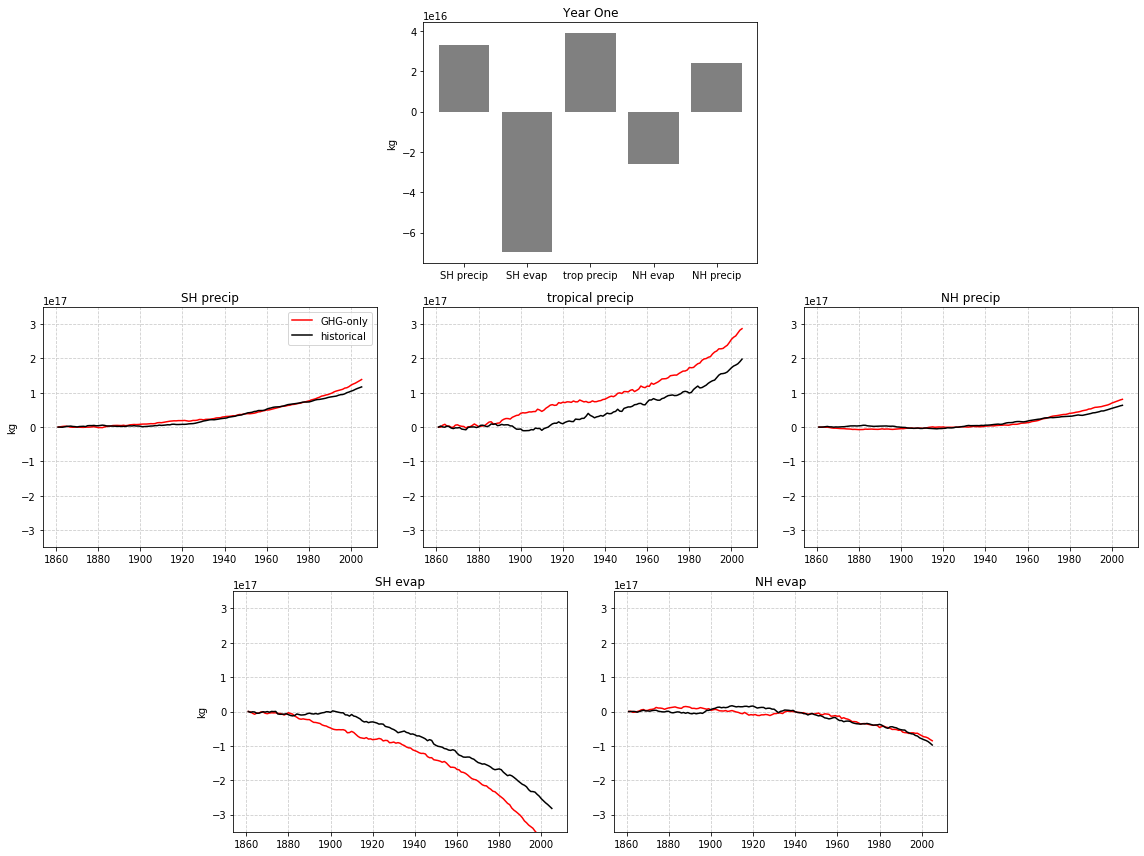

In [20]:
zonal_df_dict['IPSL-CM5A-LR'] = plot_data(zonal_dict['IPSL-CM5A-LR'], 'IPSL-CM5A-LR')

## NorESM1-M

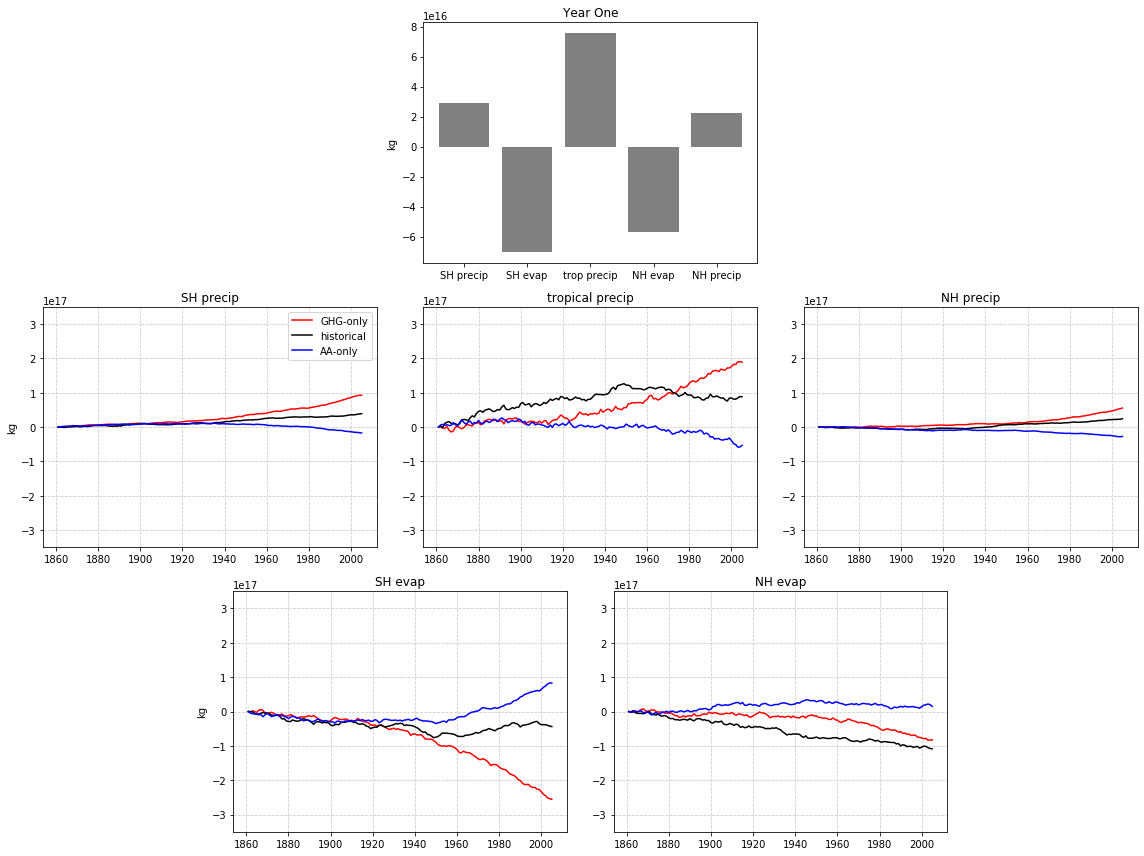

In [21]:
zonal_df_dict['NorESM1-M'] = plot_data(zonal_dict['NorESM1-M'], 'NorESM1-M')

## CCSM4

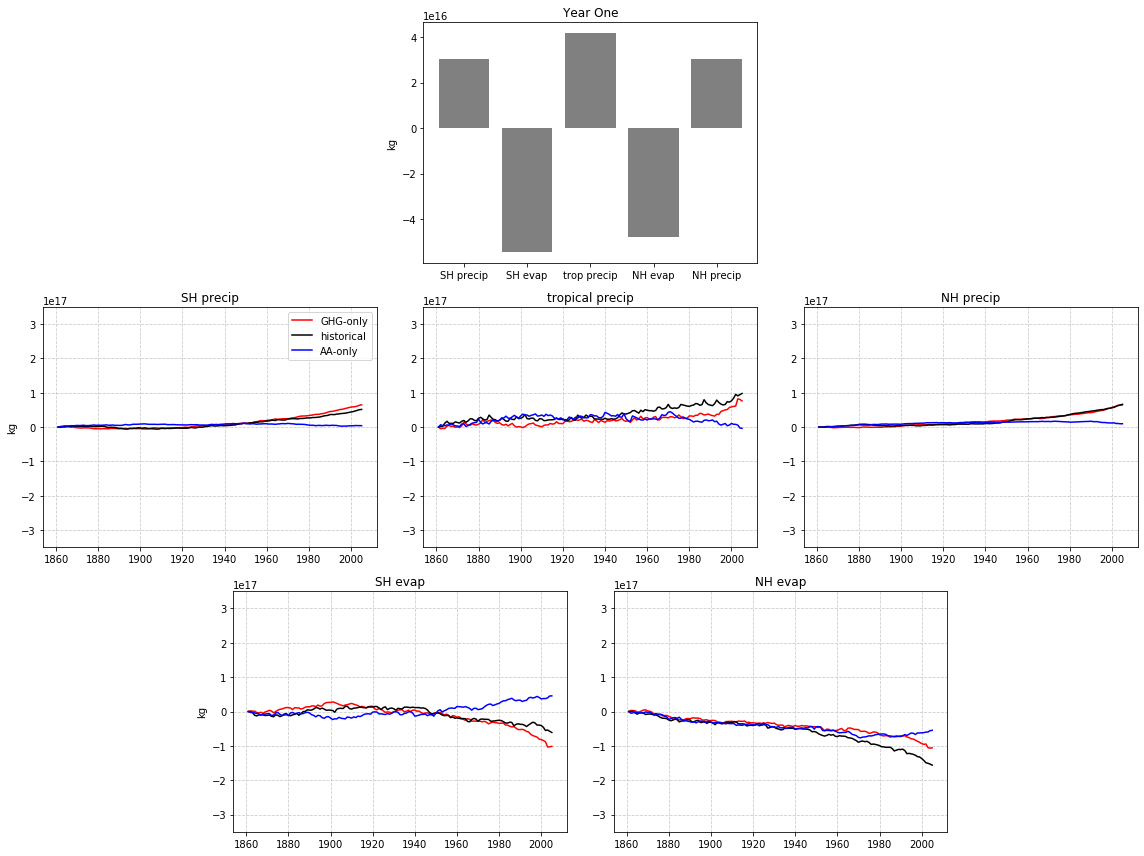

In [22]:
zonal_df_dict['CCSM4'] = plot_data(zonal_dict['CCSM4'], 'CCSM4')

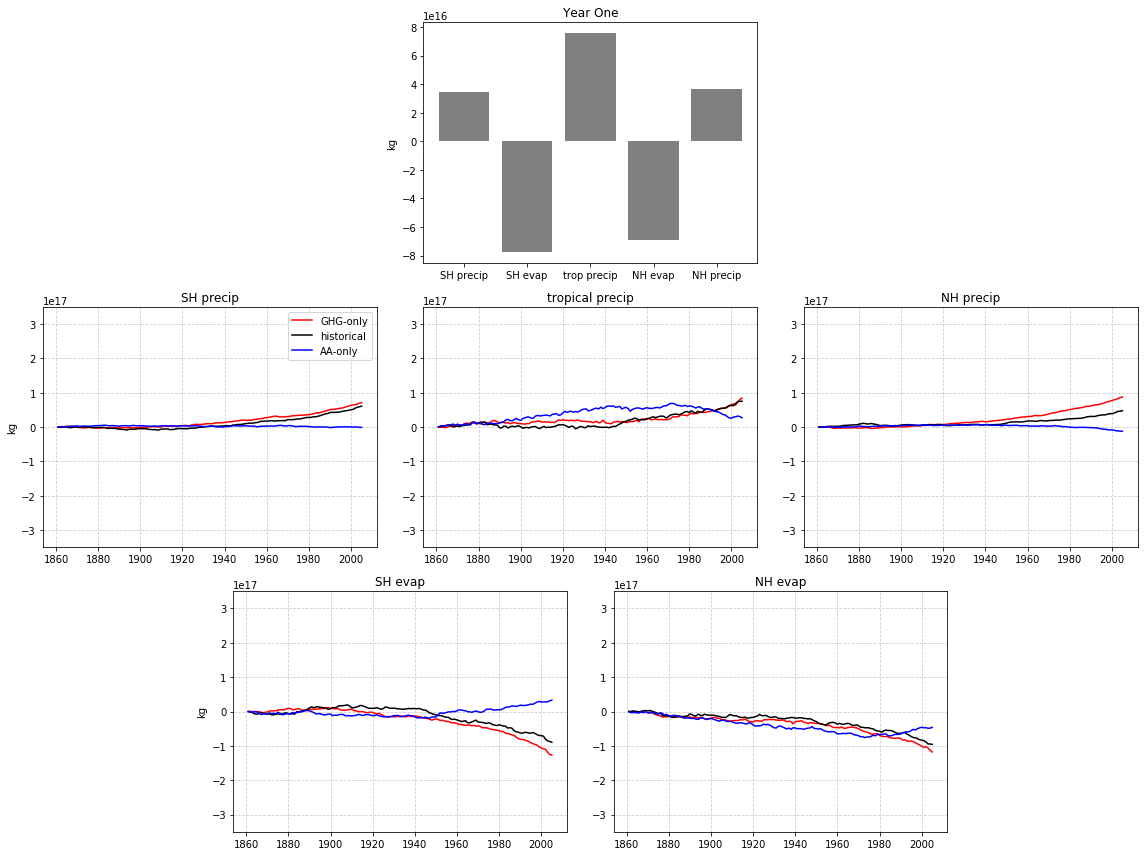

In [10]:
region_df_dict['CCSM4'] = plot_data(region_dict['CCSM4'], 'CCSM4')

## CSIRO-Mk3-6-0

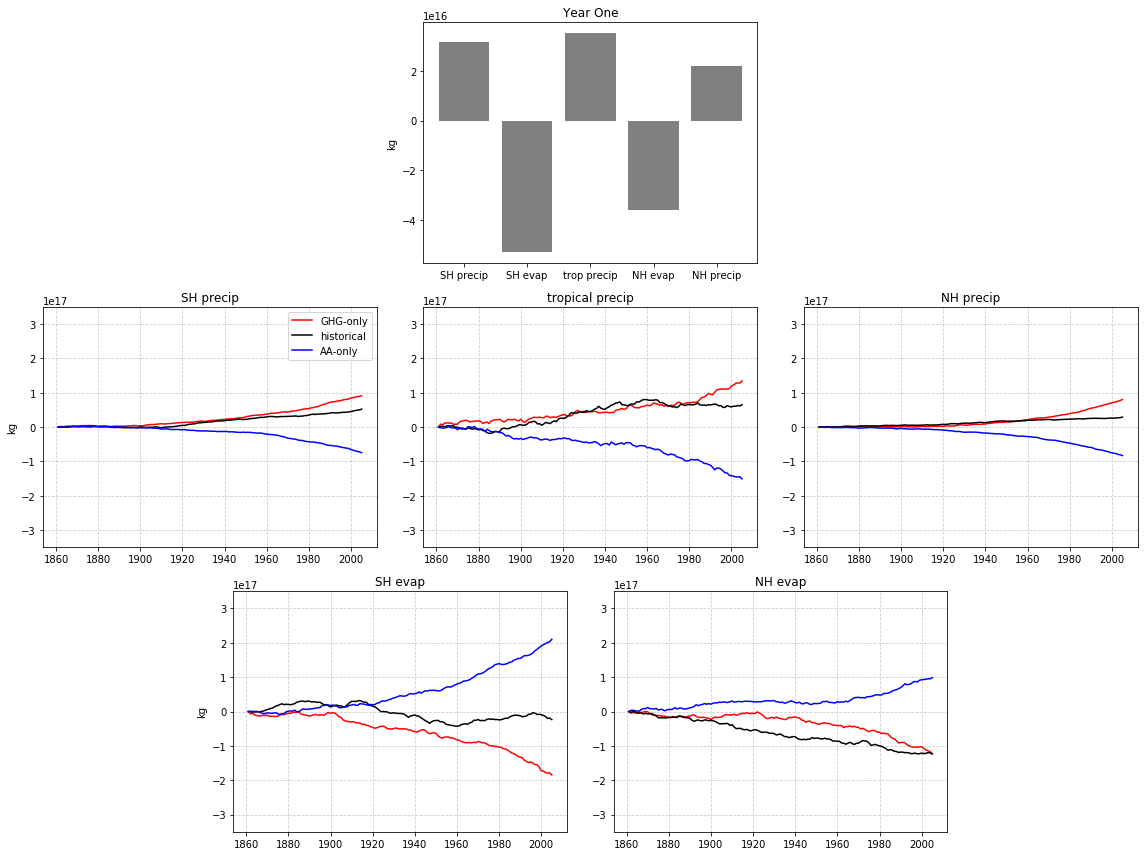

In [23]:
zonal_df_dict['CSIRO-Mk3-6-0'] = plot_data(zonal_dict['CSIRO-Mk3-6-0'], 'CSIRO-Mk3-6-0')

# Ensemble 

In [24]:
full_model_list = ['BCC-CSM2-MR', 'IPSL-CM6A-LR', 'FGOALS-g2',
                   'CanESM2', 'GFDL-CM3', 'GFDL-ESM2M',
                   'GISS-E2-H', 'GISS-E2-R', 'IPSL-CM5A-LR',
                   'NorESM1-M', 'CCSM4', 'CSIRO-Mk3-6-0']

restricted_model_list = ['BCC-CSM2-MR', 'IPSL-CM6A-LR', 'FGOALS-g2',
                        'CanESM2',
                        'GISS-E2-H', 'GISS-E2-R',
                        'NorESM1-M', 'CCSM4', 'CSIRO-Mk3-6-0']

In [31]:
def create_df(df_dict, model_list):
    """Create a dataframe for a list of models"""

    df = df_dict[model_list[0]]
    for model in model_list[1:]:
        df = df.append(df_dict[model], ignore_index=True)
    df['cumulative_change_sign_fix'] = df['cumulative_change'].where((df['region'] == 'SH precip') | (df['region'] == 'tropical precip') | (df['region'] == 'NH precip'), df['cumulative_change'] * -1)
        
    return df

In [32]:
zonal_df_full = create_df(zonal_df_dict, full_model_list)
zonal_df_full

,model,experiment,region,start,cumulative_change,percentage_change,cumulative_change_sign_fix
0,BCC-CSM2-MR,GHG-only,SH precip,4.146336e+16,1.317750e+17,2.191799,1.317750e+17
1,BCC-CSM2-MR,historical,SH precip,4.205431e+16,1.060718e+17,1.739487,1.060718e+17
2,BCC-CSM2-MR,AA-only,SH precip,3.491662e+16,-1.460218e+16,-0.288415,-1.460218e+16
3,BCC-CSM2-MR,GHG-only,SH evap,-7.776940e+16,-1.713461e+17,1.519489,1.713461e+17
4,BCC-CSM2-MR,historical,SH evap,-7.097607e+16,-6.006727e+16,0.583657,6.006727e+16
...,...,...,...,...,...,...,...
175,CSIRO-Mk3-6-0,historical,NH evap,-3.601401e+16,-1.236678e+17,2.368194,1.236678e+17
176,CSIRO-Mk3-6-0,AA-only,NH evap,-3.622907e+16,9.838909e+16,-1.872931,-9.838909e+16
177,CSIRO-Mk3-6-0,GHG-only,NH precip,2.291703e+16,8.024655e+16,2.414905,8.024655e+16
178,CSIRO-Mk3-6-0,historical,NH precip,2.203542e+16,2.908332e+16,0.910237,2.908332e+16


In [33]:
zonal_df_subset = create_df(zonal_df_dict, restricted_model_list)

In [82]:
def plot_ensemble_distribution(df, yvar):
    """Plot the ensemble results"""
    
    if 'cumulative' in yvar:
        units = 'Accumulated P-E anomaly (kg)'
    elif 'percentage' in yvar:
        units = 'Change in P-E (%)'
    
    fig, ax = plt.subplots(1, 1, figsize=[12, 8])
    #sns.swarmplot(x="Region", y="Change", hue="Experiment",
    #              data=df, ax=axes, palette='hot')
    my_pal = {"GHG-only": "tab:red", "historical": "tab:gray", "AA-only":"tab:blue"}
    sns.boxplot(x="region", y=yvar, hue="experiment",
                data=df, ax=ax, palette=my_pal)
    ax.set_ylabel(units)
    ax.axhline(0, color='0.5', linestyle='--')
    plt.show()
    
    
def plot_ensemble_lines(df, yvar, model_list, experiment):
    """Plot regional changes for each model as a line graph"""
    
    if 'cumulative' in yvar:
        units = 'Accumulated P-E anomaly (kg)'
    elif 'percentage' in yvar:
        units = 'Change in P-E (%)'
    
    xvals = np.array([1, 2, 3, 4, 5])
    fig, ax = plt.subplots(1, 1, figsize=[12, 6])
    for model_num, model_name in enumerate(model_list):
        yvals = df[(df['model'] == model_name) & (df['experiment'] == experiment)]['cumulative_change_sign_fix'].values
        linestyle = '-' if model_num < 10 else '--'
        ax.plot(xvals, yvals, label=model_name, marker='o', linestyle=linestyle)
    
    ax.set_ylabel(units)
    ax.set_xticks(xvals)
    ax.set_xticklabels(['SH precip', 'SH evap', 'trop precip', 'NH evap', 'NH precip'])
    ax.set_title(experiment)
    ax.axhline(0, color='0.8')
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

### Zonally integrated regions

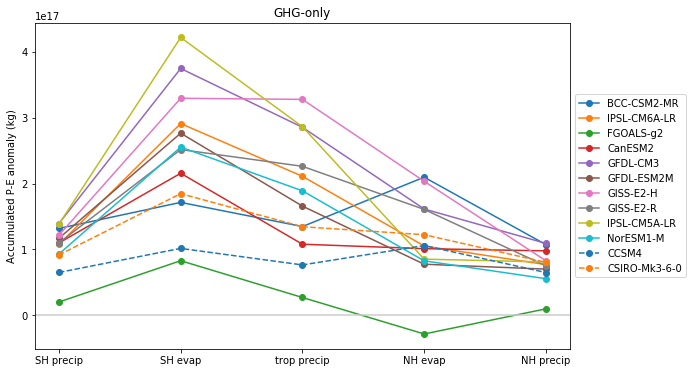

In [83]:
plot_ensemble_lines(zonal_df_full, 'cumulative_change_sign_fix', full_model_list, 'GHG-only')

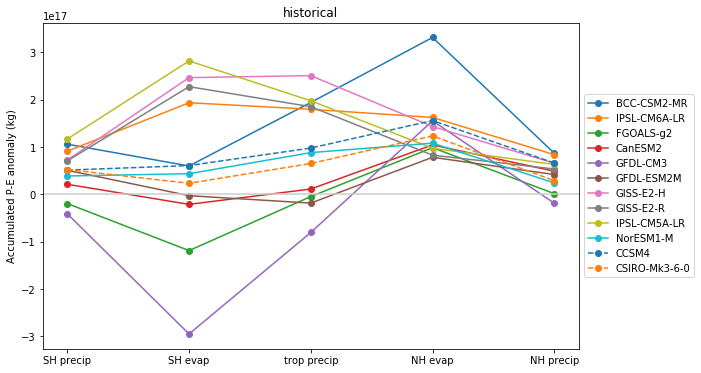

In [84]:
plot_ensemble_lines(zonal_df_full, 'cumulative_change_sign_fix', full_model_list, 'historical')

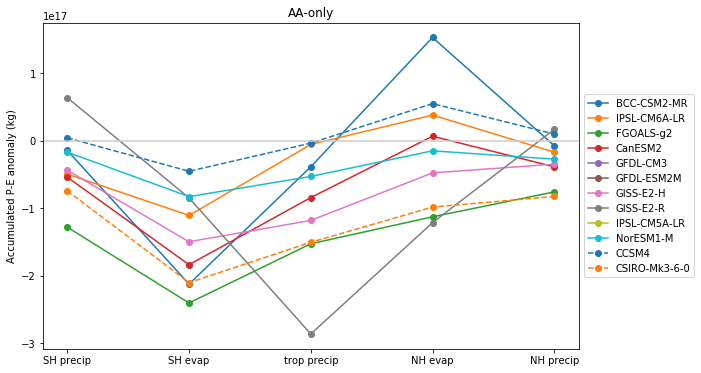

In [85]:
plot_ensemble_lines(zonal_df_full, 'cumulative_change_sign_fix', full_model_list, 'AA-only')

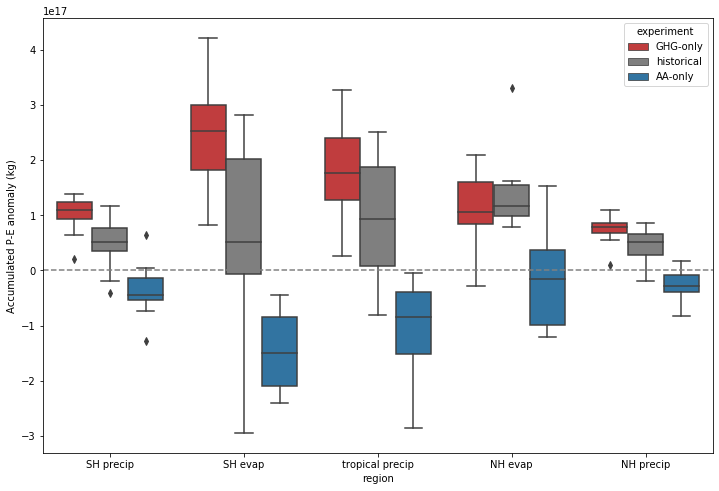

In [35]:
plot_ensemble_distribution(zonal_df_full, 'cumulative_change_sign_fix')

**Figure.** Accumulated P-E anomaly over the period 1861-2005. Each box shows the ensemble quartiles, while the whiskers extend to show the rest of the distribution, except for points determined to be outliers using a method that is a function of the inter-quartile range. Positive values indicate an increase in precipitation in the precipitation dominated regions and an increase in evaporation in the evaporation dominated regions (i.e. evaporative regions have been multiplied by -1). 

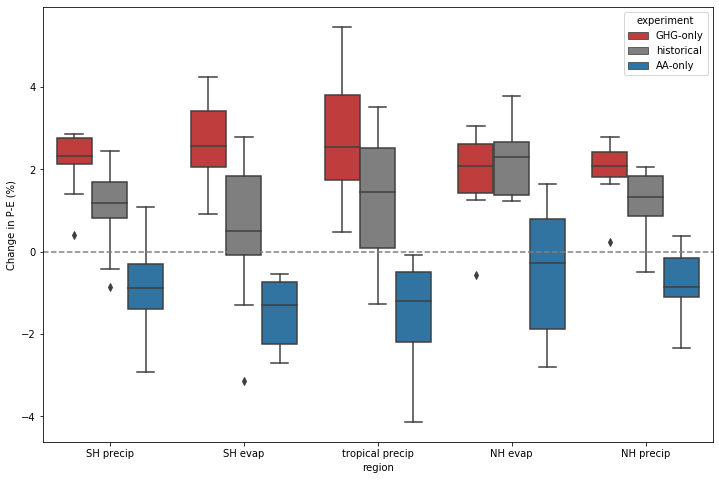

In [37]:
plot_ensemble_distribution(zonal_df_full, 'percentage_change')

**Figure.** Percentage change in P-E over the period 1861-2005. Each box shows the ensemble quartiles, while the whiskers extend to show the rest of the distribution, except for points determined to be outliers using a method that is a function of the inter-quartile range.

### Alternative regions